In [16]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import datetime as dt
import matplotlib.pyplot as plt
import pytz
import matplotlib.dates as dates

In [17]:
dataDir='/Users/edwardlrichards/Documents/data/KAM11/enviornment/tides'
fileName='tides_Nawiliwili.csv'
startTime=dt.datetime.strptime('2011 J182 00:00', '%Y J%j %H:%M')
endTime=dt.datetime.strptime('2011 J185 00:00', '%Y J%j %H:%M')

In [18]:
#time parsing
UTC=pytz.utc
dataParser=lambda s: UTC.localize(dt.datetime.strptime(\
                        str(s),'%Y-%m-%d %H:%M'))
tideData=pd.read_csv(os.path.join(dataDir,fileName),\
        parse_dates=['Date Time'],date_parser=dataParser,\
                     index_col=['Date Time'])

In [19]:
tideData[startTime:endTime].index

<class 'pandas.tseries.index.DatetimeIndex'>
[2011-07-01 00:00:00+00:00, ..., 2011-07-04 00:00:00+00:00]
Length: 721, Freq: None, Timezone: UTC

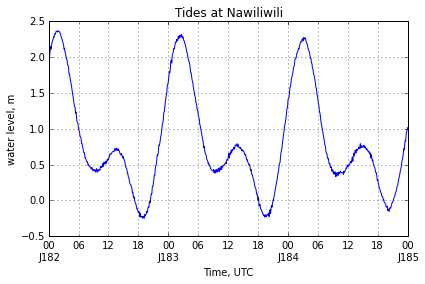

In [22]:
fig, ax = plt.subplots()
doi=tideData[startTime:endTime]
ax.plot_date(doi.index.to_pydatetime(), doi[' Water Level'],'-')
_=ax.set_title('Tides at Nawiliwili')
_=ax.set_xlabel('Time, UTC')
_=ax.set_ylabel('water level, m')
ax.xaxis.set_minor_locator(dates.HourLocator(interval=6))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%H'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.DayLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\nJ%j'))
plt.tight_layout()